In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import scipy.stats as stats
import pickle


sns.set(style="ticks", context='poster', font_scale=0.9)
%matplotlib inline

RANDOM_SEED = 8927

In [4]:
%load_ext watermark
%watermark -n -u -v -iv -w 

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: Fri Jun 06 2025

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.27.0

numpy     : 1.25.2
pandas    : 2.2.2
scipy     : 1.11.3
seaborn   : 0.13.2
arviz     : 0.19.0
pymc      : 5.9.1
matplotlib: 3.8.1

Watermark: 2.4.3



In [5]:
LTEI_ctrl = pd.read_excel('./raw_data/control_LTEI.xlsx', index_col=0)
file = open("./stat_inf/control_LTEI_HM_comp.pickle",'rb')
stat_inf = pickle.load(file)
xls = pd.ExcelFile('./raw_data/Main_Figures_Paper1.xlsx')
df_novo = pd.read_excel(xls, "novo_LTEI", index_col=0)
df_novo2 = pd.read_excel(xls, "novo_LTEI_2", index_col=0)

## Figure 1B

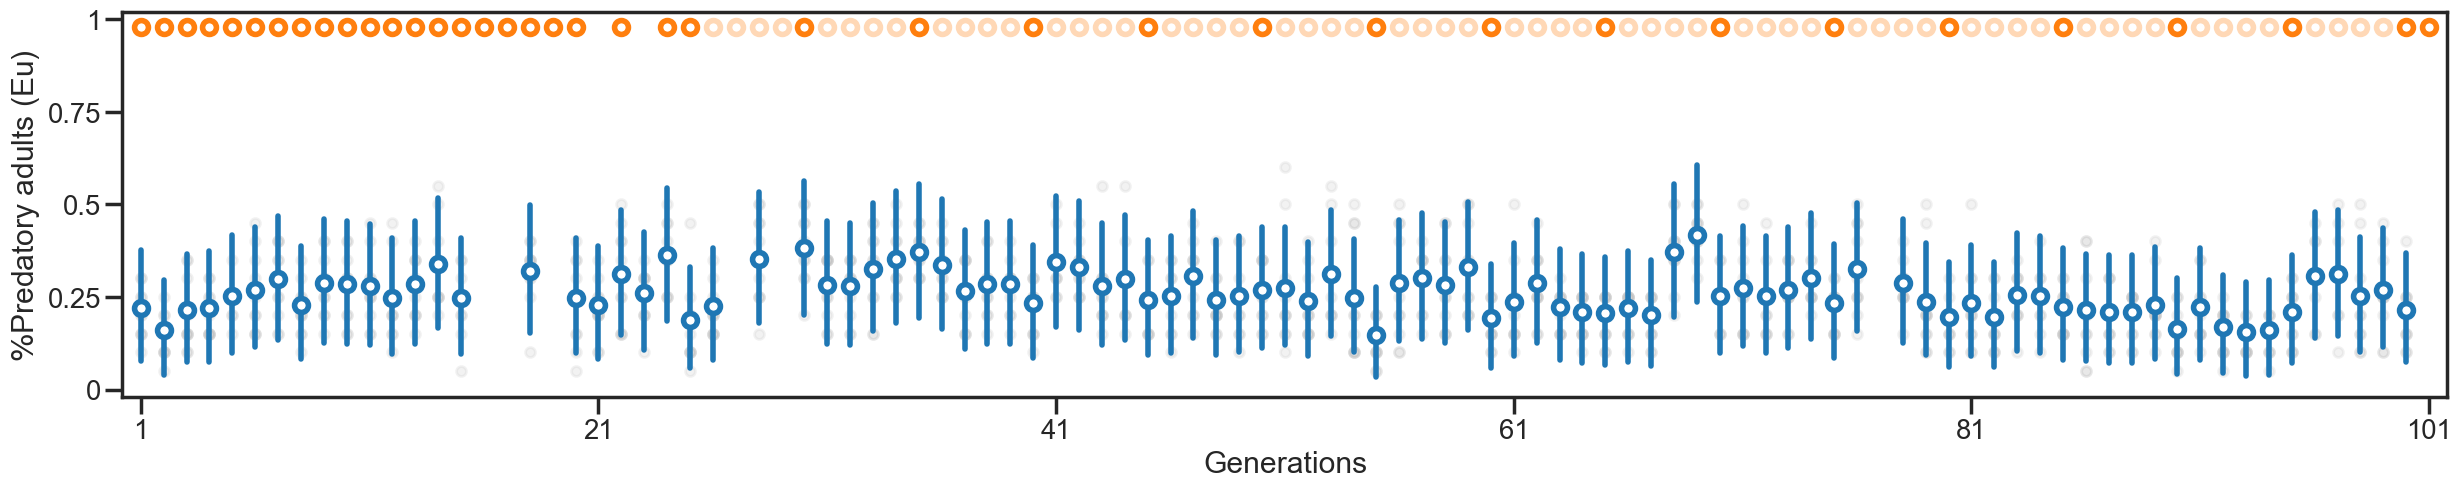

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(30,5))

col=sns.color_palette("tab10")[1]
for i in df_novo2.columns:
    plt.scatter(int(i[1:]), 0.98, s=100, edgecolors=col, color='white', alpha=0.3, linewidths=4, zorder=4)

for i in df_novo.columns:
    plt.scatter(int(i[1:]), 0.98, s=100, edgecolors=col, color='white', linewidths=4, zorder=4)



col=sns.color_palette("tab10")[0]
count = 1
hdi_list = []
for i in LTEI_ctrl.columns:
    inf_summ = az.summary(stat_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    hdi_list.append((np.mean(l_hdi), np.mean(h_hdi)))
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=100, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(LTEI_ctrl[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.2, linewidths=2, zorder=1)
    count += 1

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.02, 1.02), xticks=np.linspace(1, 101, 6), xlim=(0.2, 101.8), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 1C

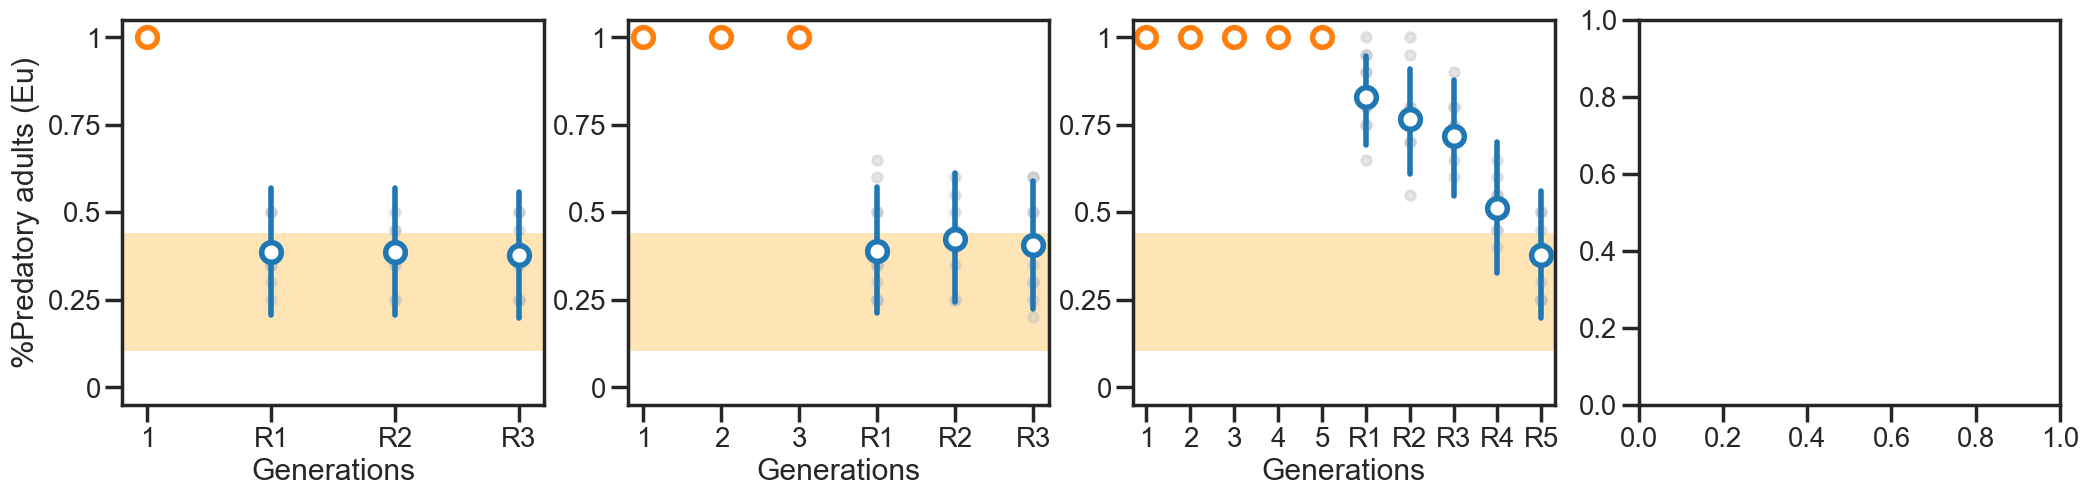

In [16]:
df_R1 = pd.read_excel(xls, "F1Rev", index_col=0)
file = open("./stat_inf/R1_HM.pickle",'rb')
df_R1_inf = pickle.load(file)

fig, axes = plt.subplots(1, 4, figsize=(25,5))

axes = axes.flatten()

col=sns.color_palette("tab10")[0]


for i in df_R1.columns:
    if int(i[1:]) ==1:
        y = np.array(df_R1[i])/20.
        axes[0].scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R1_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        axes[0].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        axes[0].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R1[i])/20.
        axes[0].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[0].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[0].set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 4, 4), xticklabels=[1, 'R1', 'R2', 'R3'], xlim=(0.8, 4.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

df_R3 = pd.read_excel(xls, "F3Rev", index_col=0)
file = open("./stat_inf/R3_HM.pickle",'rb')
df_R3_inf = pickle.load(file)
col=sns.color_palette("tab10")[0]
col=sns.color_palette("tab10")[0]

for i in df_R3.columns:
    if int(i[1:]) <= 3:
        y = np.array(df_R3[i])/20.
        axes[1].scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R3_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        axes[1].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        axes[1].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R3[i])/20.
        axes[1].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[1].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[1].set(ylabel=r' ', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 6, 6), xticklabels=[1, 2, 3, 'R1', 'R2', 'R3'],  xlim=(0.8, 6.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

df_R5 = pd.read_excel(xls, "F5Rev", index_col=0)
file = open("./stat_inf/R5_HM.pickle",'rb')
df_R5_inf = pickle.load(file)


col=sns.color_palette("tab10")[0]


for i in df_R5.columns:
    if int(i[1:]) <= 5:
        y = np.array(df_R5[i])/20.
        axes[2].scatter(int(i[1:]), np.mean(y), s=200, edgecolors=sns.color_palette("tab10")[1], color='white', alpha=1, linewidths=4, zorder=2)
    else:
        inf_summ = az.summary(df_R5_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        axes[2].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        axes[2].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_R5[i])/20.
        axes[2].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)


col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[2].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[2].set(ylabel=r'', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 10, 10), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'], xlim=(0.7, 10.3), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 1F

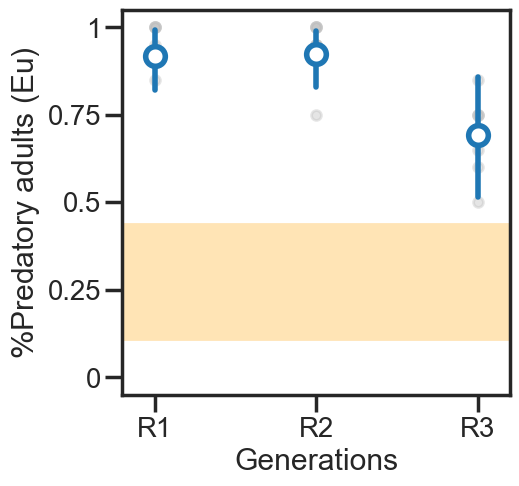

In [17]:
df_mating = pd.read_excel(xls, "EXN")
file = open("./stat_inf/mating_HM.pickle",'rb')
df_mating_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

col=sns.color_palette("tab10")[0]


for i in df_mating.columns:
        inf_summ = az.summary(df_mating_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
        y = np.array(df_mating[i])/20.
        plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 3, 3), xticklabels=['R1', 'R2', 'R3'], xlim=(0.8, 3.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 1G

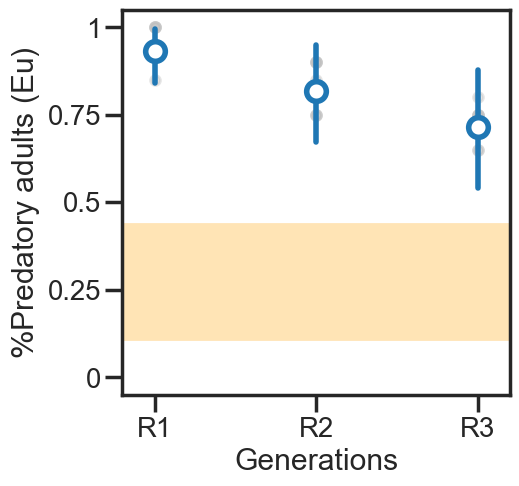

In [18]:
mE = pd.read_excel('./raw_data/NxE.xlsx', index_col=0)
file = open("./stat_inf/mating2_HM.pickle",'rb')
mE_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

col=sns.color_palette("tab10")[0]


for i in mE.columns:
    inf_summ = az.summary(mE_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(mE[i])/20.
    plt.scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 3, 3), xticklabels=['R1', 'R2', 'R3'],  xlim=(0.8, 3.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2B

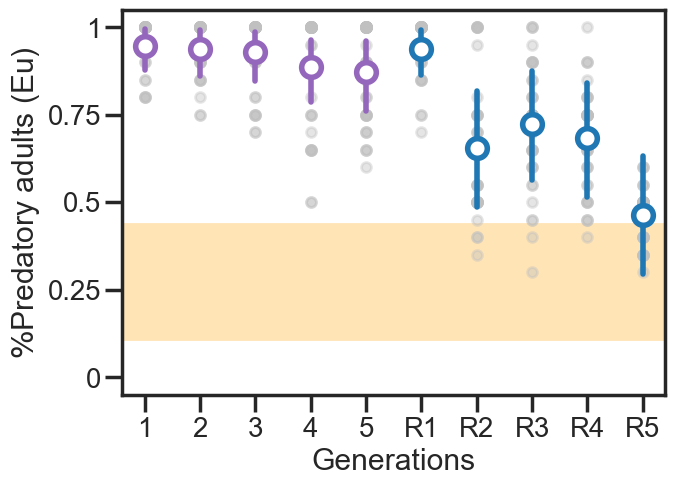

In [19]:
B12_1000nM = pd.read_excel(xls, "1000nM-B12", index_col=0)
file = open("./stat_inf/B12_1000nm_HM.pickle",'rb')
B12_1000nM_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[4]

count = 1
for i in B12_1000nM.columns:
    inf_summ = az.summary(B12_1000nM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count < 6:
        col_curr = col1
    else:
        col_curr = col
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=4)
        
    y = np.array(B12_1000nM[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 10, 10), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'], xlim=(0.6, 10.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2C

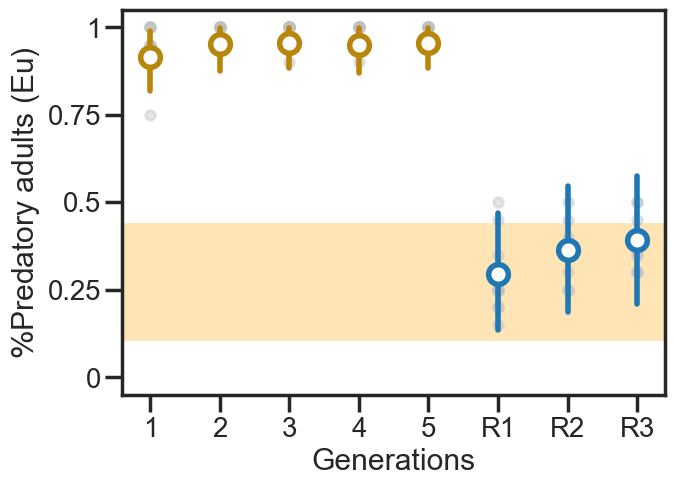

In [20]:
novo_mutant = pd.read_excel(xls, "Novo-mutant", index_col=0)
file = open("./stat_inf/novo_mut_HM.pickle",'rb')
novo_mut_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]
col1 = '#B8860B'

count = 1
for i in novo_mutant.columns:
    inf_summ = az.summary(novo_mut_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count < 6:
        col_curr = col1
    else:
        col_curr = col
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=5)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=5)
    y = np.array(novo_mutant[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1
    
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 8, 8), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3'], xlim=(0.6, 8.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 2D

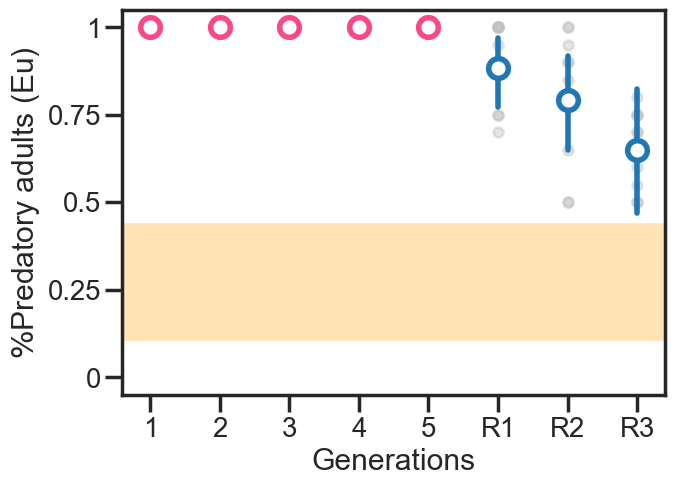

In [21]:
B12_rescue = pd.read_excel(xls, "B12rescue", index_col=0)
file = open("./stat_inf/B12_rescue_HM.pickle",'rb')
B12_rescue_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[1]

count = 1
for i in B12_rescue.columns:
    y = np.array(B12_rescue[i])/20.
    if int(i[1:]) > 5:
        inf_summ = az.summary(B12_rescue_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=5)
        plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count, np.mean(y), s=200, edgecolors='#F64A8A', color='white', alpha=1, linewidths=4, zorder=3)
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 8, 8), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3'], xlim=(0.6, 8.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3C

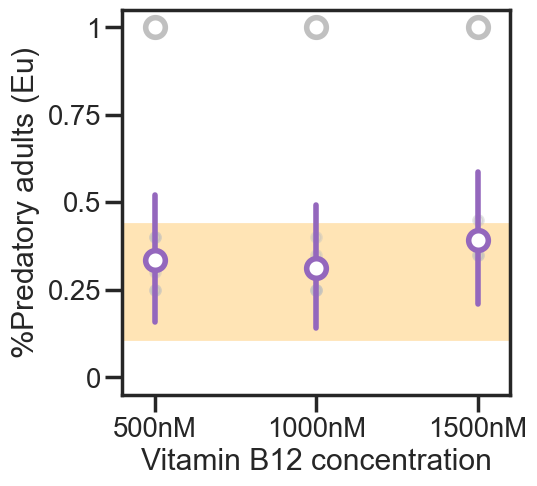

In [22]:
metr1_B12 = pd.read_excel('./raw_data/metr-1_B12.xlsx', index_col=0)
file = open("./stat_inf/metr1_B12_HM.pickle",'rb')
metr1_B12_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(5,5))

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[4]

count = 1
for i in metr1_B12.columns:
    inf_summ = az.summary(metr1_B12_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col1, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col1, color='white', linewidths=4, zorder=4)
    y = np.array(metr1_B12[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1
col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

for i in np.arange(1, 4, 1):
    plt.scatter(i, 1, s=200, edgecolors='silver', color='white', alpha=1, linewidths=4, zorder=3)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Vitamin B12 concentration', ylim=(-0.05, 1.05), xticks=np.linspace(1, 3, 3), xticklabels=['500nM', '1000nM', '1500nM'], xlim=(0.8, 3.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3D

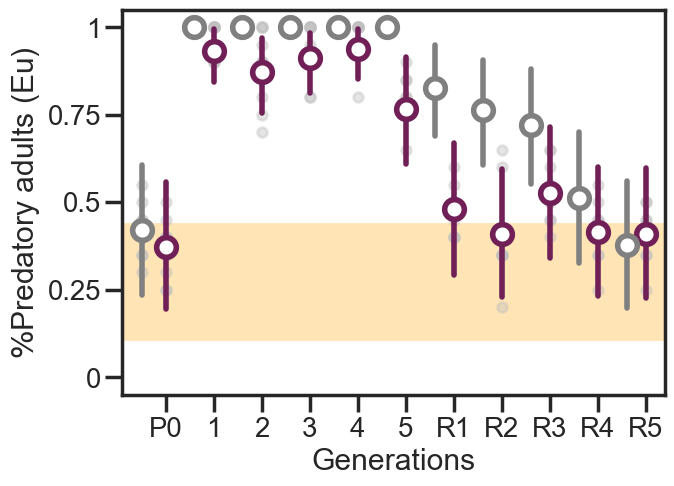

In [23]:
VB12_mutants = pd.ExcelFile('./raw_data/VB12_mutants.xlsx')
metr1 = pd.read_excel(VB12_mutants, "metr-1", index_col=0)
xls_2 = pd.ExcelFile('./raw_data/mutants_Paper2.xlsx')
df_R5 = pd.read_excel(xls_2, "WT_F5rev", index_col=0)
file = open("./stat_inf/metr1_HM_fin.pickle",'rb')
metr1_inf = pickle.load(file)
file = open("./stat_inf/WT_F5Rev_inf.pickle",'rb')
WT_F5Rev_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(7,5))

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("rocket_r")[-2]

count = 1
for i in metr1.columns:
    inf_summ = az.summary(metr1_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    col_curr = col1
    plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=4)
    y = np.array(metr1[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if count==1:
            inf_summ = az.summary(WT_F5Rev_inf['P0'], hdi_prob=0.95)
            inf_mean = np.array(inf_summ['mean'][2:])
            l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
            h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
            plt.vlines(count-0.5, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
            plt.scatter(count-0.5, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)
            y = np.array(df_R5['F0'])/20.
            plt.scatter([count-0.5 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)   
    count += 1

count = 7
for i in ['R1', 'R2', 'R3', 'R4', 'R5']:
        inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)
        count +=1

for i in np.arange(2, 7, 1):
    plt.scatter(i-0.4, 1, s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 11, 11), xticklabels=['P0', 1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'], xlim=(0.1, 11.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 3E

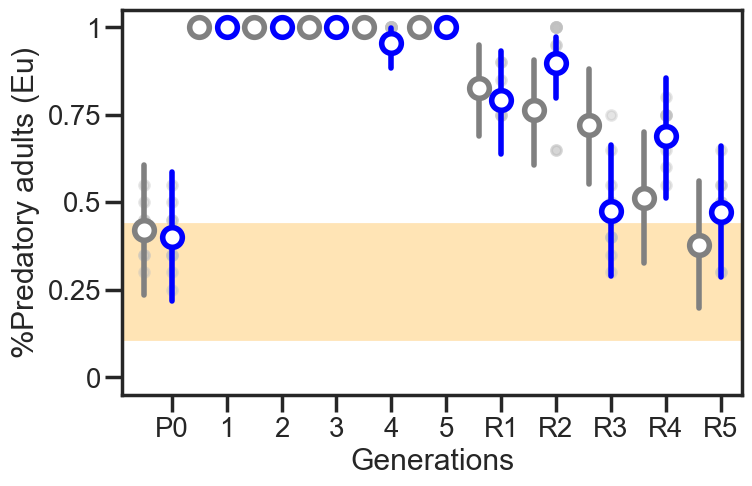

In [24]:
mce1 = pd.read_excel(VB12_mutants, "mce-1", index_col=0)
file = open("./stat_inf/mce1_inf_HM_v2.pickle",'rb')
mce1_inf = pickle.load(file)

fig, ax = plt.subplots(1, 1, figsize=(8,5))

col=sns.color_palette("tab10")[0]
col1 = 'blue'

count = 1
for i in mce1.columns:
    inf_summ = az.summary(mce1_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if 1< count < 7:
        col_curr = col1
    # elif count == 1:
    #     col_curr = 'gray'
    else:
        col_curr = col1
    if i in ['F1', 'F2', 'F3', 'F5']:
        plt.scatter(count, 1, s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=5)
    else:
        plt.vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=5)
    y = np.array(mce1[i])/20.
    plt.scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if count==1:
        inf_summ = az.summary(WT_F5Rev_inf['P0'], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.5, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(count-0.5, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)
        y = np.array(df_R5['F0'])/20.
        plt.scatter([count-0.5 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)   
    
    count += 1


count = 7
for i in ['R1', 'R2', 'R3', 'R4', 'R5']:
        inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][2:])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
        h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
        plt.vlines(count-0.4, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
        plt.scatter(count-0.4, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)
        # y = np.array(df_R5[i])/20.
        # plt.scatter([count-0.4 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2) 
        count +=1


for i in np.arange(2, 7, 1):
    plt.scatter(i-0.5, 1, s=200, edgecolors='gray', color='white', linewidths=4, zorder=4)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 11, 11), xticklabels=['P0', 1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4', 'R5'], xlim=(0.1, 11.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 4

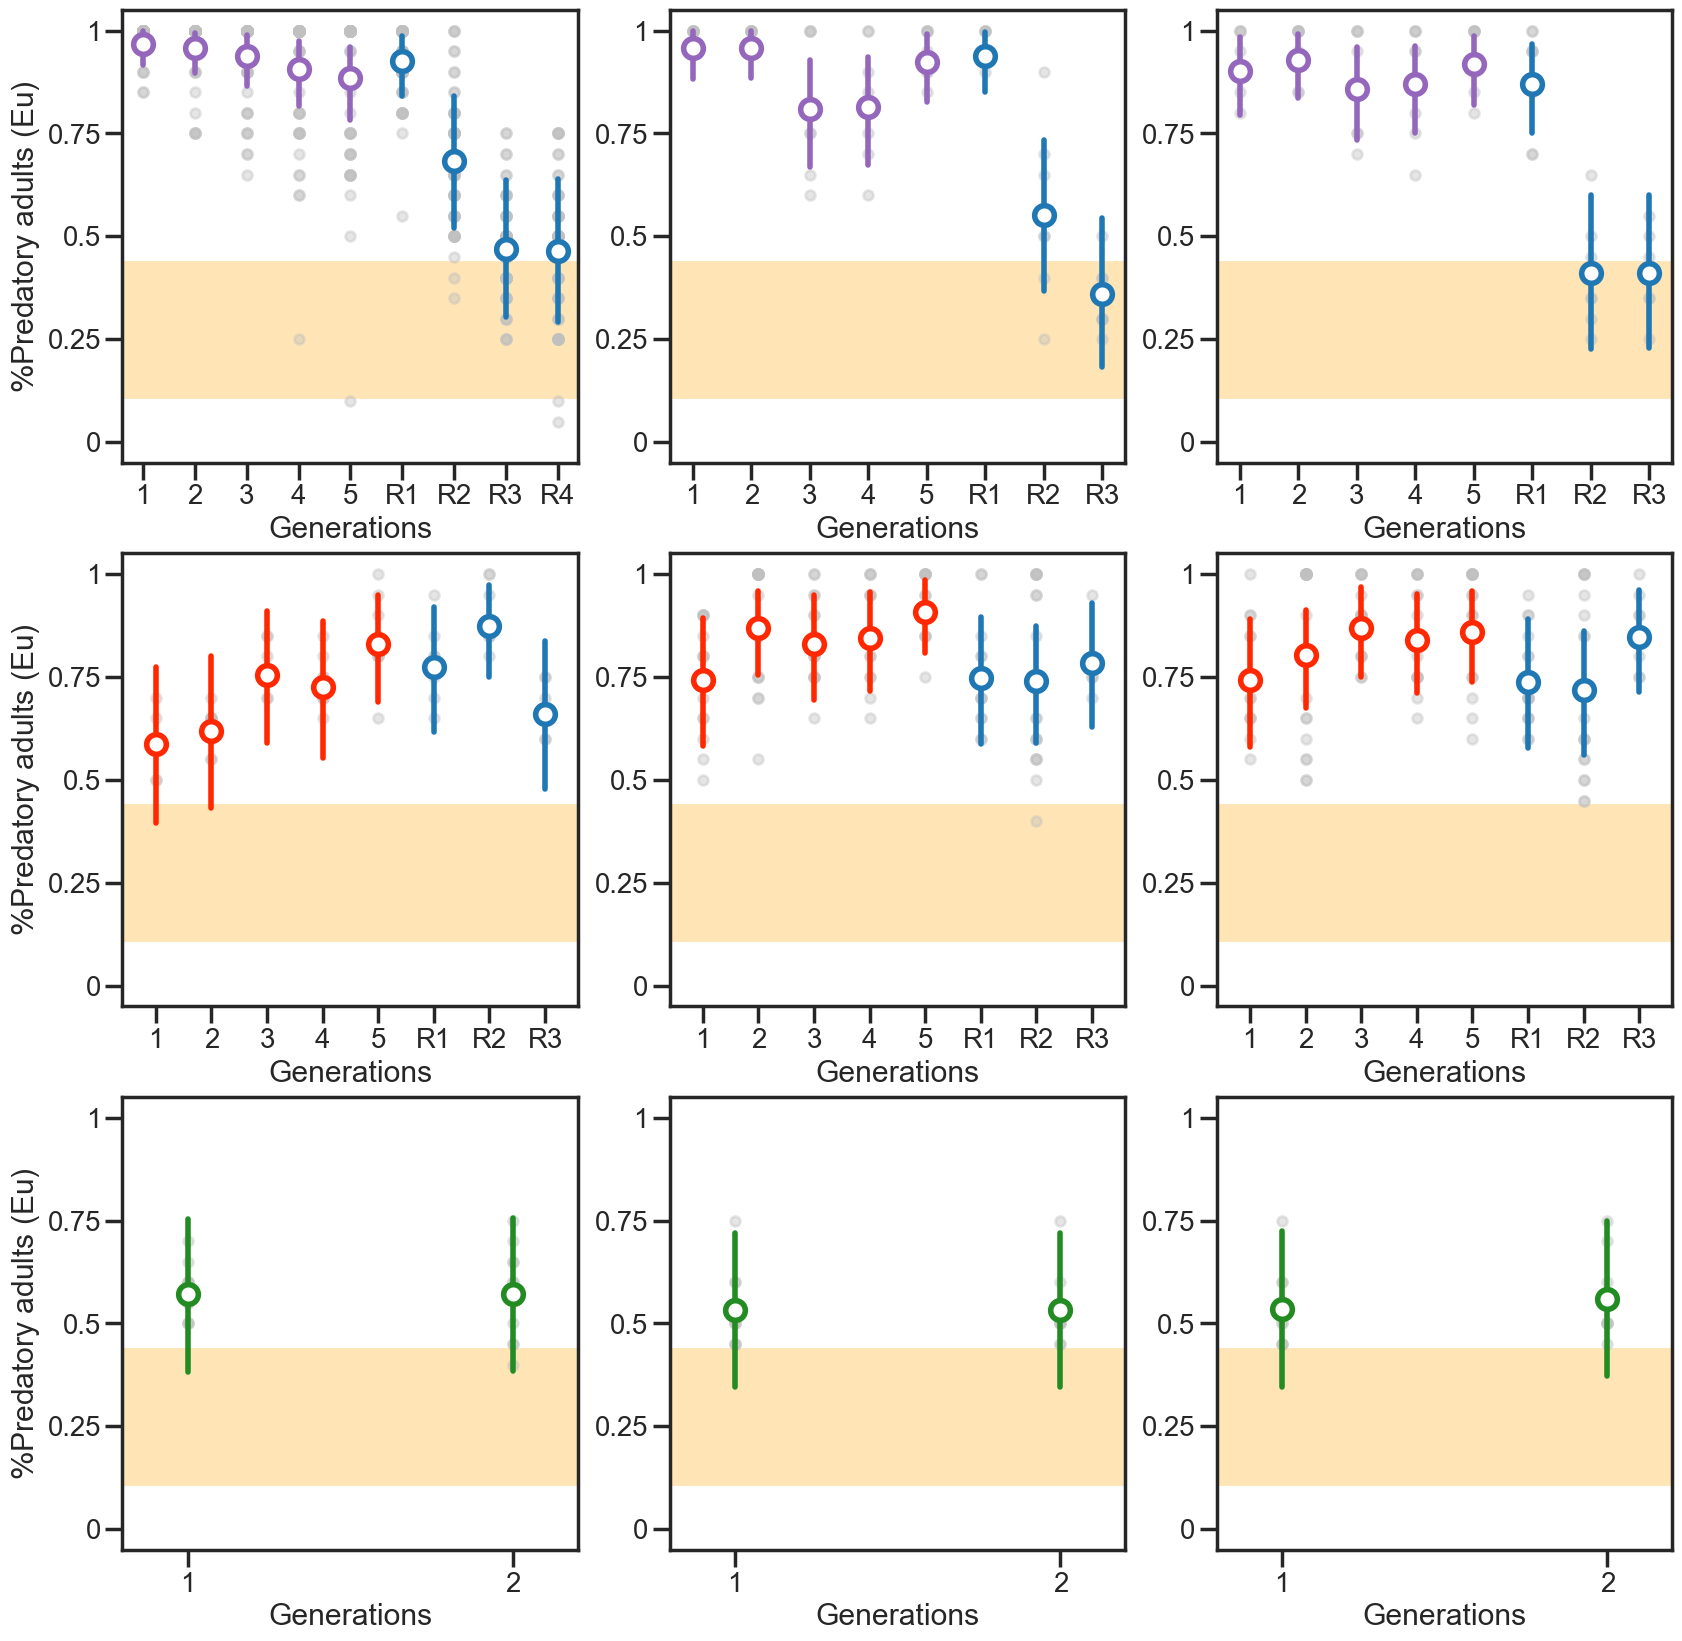

In [36]:
fig, axes = plt.subplots(3, 3, figsize=(20,20))

axes = axes.flatten()

B12_500nM = pd.read_excel(xls, "500nM-B12", index_col=0)
file = open("./stat_inf/B12_500nM_HM.pickle",'rb')
B12_500nM_inf = pickle.load(file)

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[4]

count = 1
for i in B12_500nM.columns:
    inf_summ = az.summary(B12_500nM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count < 6:
        col_curr = col1
    else:
        col_curr = col
    axes[0].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[0].scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=4)
    y = np.array(B12_500nM[i])/20.
    axes[0].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[0].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[0].set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 9, 9), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3', 'R4'], xlim=(0.6, 9.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

B12_250nM = pd.read_excel(xls, "250nM-B12", index_col=0)
file = open("./stat_inf/B12_250nM_HM.pickle",'rb')
B12_250nM_inf = pickle.load(file)

col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[4]

count = 1
for i in B12_250nM.columns:
    inf_summ = az.summary(B12_250nM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count < 6:
        col_curr = col1
    else:
        col_curr = col
    axes[1].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[1].scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=4)

    y = np.array(B12_250nM[i])/20.
    axes[1].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[1].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[1].set(ylabel=r'', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 8, 8), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3'], xlim=(0.6, 8.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

B12_125nM = pd.read_excel(xls, "125nM-B12", index_col=0)
file = open("./stat_inf/B12_125nM_HM.pickle",'rb')
B12_125nM_inf = pickle.load(file)


col=sns.color_palette("tab10")[0]
col1 = sns.color_palette("tab10")[4]

count = 1
for i in B12_125nM.columns:
    inf_summ = az.summary(B12_125nM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count < 6:
        col_curr = col1
    else:
        col_curr = col
    axes[2].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=col_curr, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[2].scatter(count, np.mean(inf_mean), s=200, edgecolors=col_curr, color='white', linewidths=4, zorder=4)
        
    y = np.array(B12_125nM[i])/20.
    axes[2].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[2].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[2].set(ylabel=r' ', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 8, 8), xticklabels=[1, 2, 3, 4, 5, 'R1', 'R2', 'R3'], xlim=(0.6, 8.4), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])


folate_xls = pd.ExcelFile('./raw_data/Methionine_Folate.xlsx')
met_20mM = pd.read_excel(folate_xls, "Met-20mM")
file = open("./stat_inf/met_20mM_HM.pickle",'rb')
met_20mM_inf = pickle.load(file)

col=sns.color_palette("tab10")[0]
col2 = '#FF2800'


count = 1
for i in met_20mM.columns:
    inf_summ = az.summary(met_20mM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count <= 5:
        curr_col = col2
    else:
        curr_col = col
    axes[3].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=curr_col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[3].scatter(count, np.mean(inf_mean), s=200, edgecolors=curr_col, color='white', linewidths=4, zorder=4)
    y = np.array(met_20mM[i])/20.
    axes[3].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1


col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[3].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


axes[3].set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 9, 1),
       xticklabels=[1, 2, 3, 4, 5,  'R1', 'R2', 'R3'],
       ylim=(-0.05, 1.05), xlim=(0.4, 8.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])


met_10mM = pd.read_excel(folate_xls, "Met-10mM")
file = open("./stat_inf/met_10mM_HM.pickle",'rb')
met_10mM_inf = pickle.load(file)

col=sns.color_palette("tab10")[0]
col2 = '#FF2800'


count = 1
for i in met_10mM.columns:
    inf_summ = az.summary(met_10mM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count <= 5:
        curr_col = col2
    else:
        curr_col = col
    axes[4].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=curr_col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[4].scatter(count, np.mean(inf_mean), s=200, edgecolors=curr_col, color='white', linewidths=4, zorder=4)
    y = np.array(met_10mM[i])/20.
    axes[4].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1


col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[4].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


axes[4].set(ylabel=r' ', xlabel='Generations', xticks=np.arange(1, 9, 1),
       xticklabels=[1, 2, 3, 4, 5,  'R1', 'R2', 'R3'],
       ylim=(-0.05, 1.05), xlim=(0.4, 8.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

met_5mM = pd.read_excel(folate_xls, "Met-5mM")
file = open("./stat_inf/met_5mM_HM.pickle",'rb')
met_5mM_inf = pickle.load(file)

col=sns.color_palette("tab10")[0]
col2 = '#FF2800'


count = 1
for i in met_5mM.columns:
    inf_summ = az.summary(met_5mM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    if count <= 5:
        curr_col = col2
    else:
        curr_col = col
    axes[5].vlines(count, np.mean(l_hdi), np.mean(h_hdi),  colors=curr_col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[5].scatter(count, np.mean(inf_mean), s=200, edgecolors=curr_col, color='white', linewidths=4, zorder=4)
    y = np.array(met_5mM[i])/20.
    axes[5].scatter([count for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    count += 1


col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[5].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)


axes[5].set(ylabel=r'', xlabel='Generations', xticks=np.arange(1, 9, 1),
       xticklabels=[1, 2, 3, 4, 5,  'R1', 'R2', 'R3'],
       ylim=(-0.05, 1.05), xlim=(0.4, 8.6), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])

folate_100uM = pd.read_excel(folate_xls, "Folate-100uM")
file = open("./stat_inf/folate_100uM_HM.pickle",'rb')
folate_100uM_inf = pickle.load(file)

col='#228B22'


for i in folate_100uM.columns:
    inf_summ = az.summary(folate_100uM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    axes[6].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[6].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(folate_100uM[i])/20.
    axes[6].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[6].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[6].set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 2, 2), xticklabels=[1, 2],  xlim=(0.8, 2.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])


folate_50uM = pd.read_excel(folate_xls, "Folate-50uM")
file = open("./stat_inf/folate_50uM_HM.pickle",'rb')
folate_50uM_inf = pickle.load(file)

col='#228B22'


for i in folate_50uM.columns:
    inf_summ = az.summary(folate_50uM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    axes[7].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[7].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(folate_50uM[i])/20.
    axes[7].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[7].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[7].set(ylabel=r' ', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 2, 2), xticklabels=[1, 2],  xlim=(0.8, 2.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);


folate_10uM = pd.read_excel(folate_xls, "Folate-10uM")
file = open("./stat_inf/folate_10uM_HM.pickle",'rb')
folate_10uM_inf = pickle.load(file)

col='#228B22'


for i in folate_10uM.columns:
    inf_summ = az.summary(folate_10uM_inf[i], hdi_prob=0.95)
    inf_mean = np.array(inf_summ['mean'][2:])
    l_hdi =  np.array(inf_summ['hdi_2.5%'][2:])
    h_hdi = np.array(inf_summ['hdi_97.5%'][2:])
    axes[8].vlines(int(i[1:]), np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=3)
    axes[8].scatter(int(i[1:]), np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=4)
    y = np.array(folate_10uM[i])/20.
    axes[8].scatter([int(i[1:]) for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)

col = 'moccasin'
x = np.linspace(-1, 105, 20)
axes[8].fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

axes[8].set(ylabel=r'', xlabel='Generations', ylim=(-0.05, 1.05), xticks=np.linspace(1, 3, 3), xticklabels=[1, 2, 3],  xlim=(0.8, 2.2), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1]);

## Figure 6A

In [3]:
WT_F5Rev= pd.read_excel('../B12/WT_F5Rev.xlsx',index_col=0)

In [5]:
rme_F5Rev= pd.read_excel('../B12/rme2_F5Rev.xlsx',index_col=0)

In [24]:
file = open("../B12/stat_inf_obj/WT_F5Rev_inf",'rb')
WT_F5Rev_inf = pickle.load(file)

In [17]:
file = open("../B12/stat_inf_obj/rme_F5Rev_inf",'rb')
rme_F5Rev_inf = pickle.load(file)

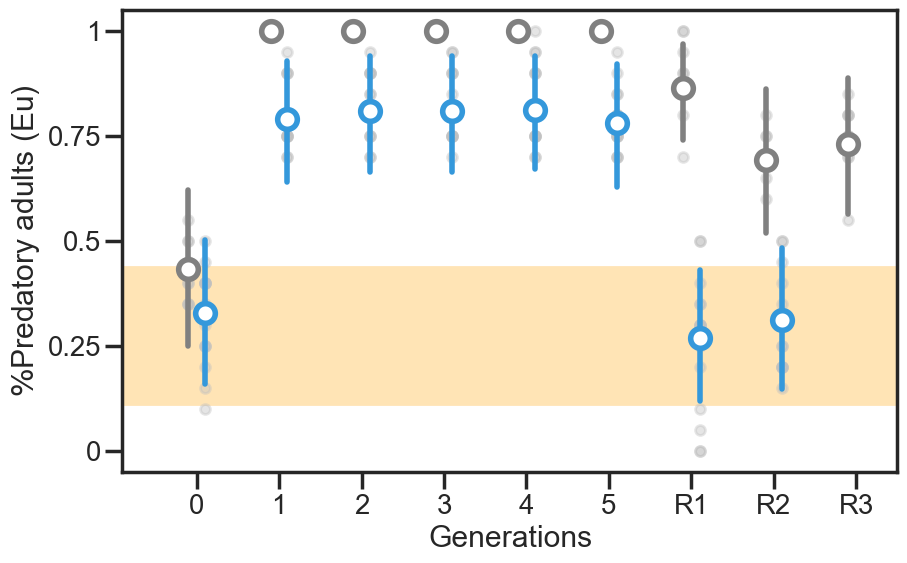

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))

col='#3498DB'
col1= '#2ECC71'
col2= '#D35400'
col3= '#D30000'

count = 1
for i in WT_F5Rev.columns:
    y = np.array(WT_F5Rev[i])/20.
    ax.scatter([count - 0.1 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(WT_F5Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.1, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.1, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.1, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in rme_F5Rev.columns:
    y = np.array(rme_F5Rev[i])/20.
    ax.scatter([count + 0.1 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(rme_F5Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count+0.1, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count+0.1, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count+0.1, np.mean(y), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    count += 1


col = 'moccasin'
x = np.linspace(-0.5, 10)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 10, 1), 
       xticklabels=[0, 1, 2, 3, 4, 5, 'R1', 'R2', 'R3'],
       ylim=(-0.05, 1.05), xlim=(0.1, 9.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])


plt.savefig('../B12/rme_F5Rev.pdf', bbox_inches='tight', dpi=100);

## Figure 6B

In [21]:
WT_F10Rev= pd.read_excel('../B12/WT_F10Rev.xlsx',index_col=0)

In [22]:
file = open("../B12/stat_inf_obj/WT_F10Rev_inf",'rb')
WT_F10Rev_inf = pickle.load(file)

In [26]:
rme_F10Rev= pd.read_excel('../B12/rme2_F10Rev.xlsx',index_col=0)

In [27]:
file = open("../B12/stat_inf_obj/rme_F10Rev_inf",'rb')
rme_F10Rev_inf = pickle.load(file)

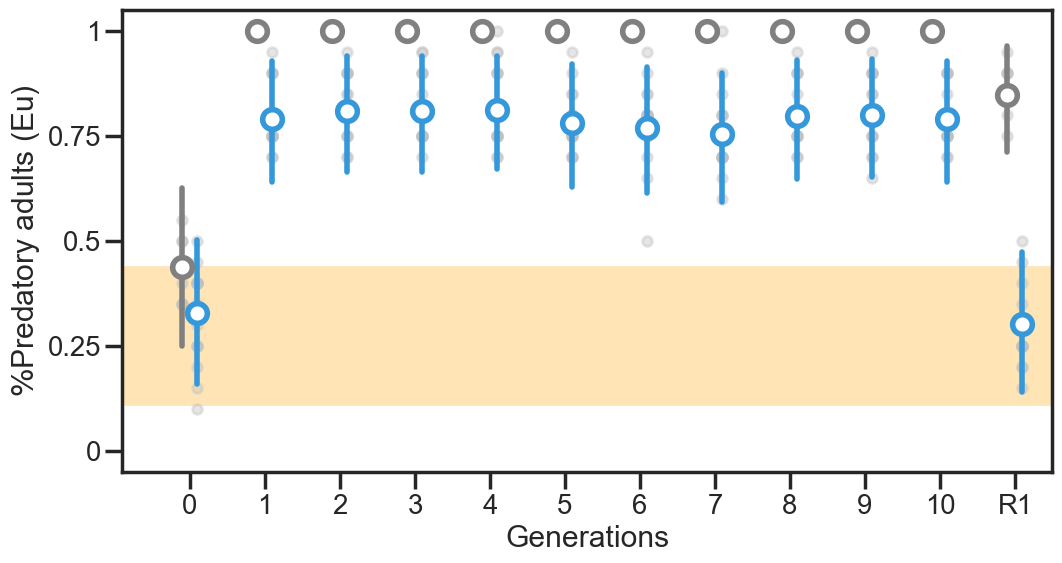

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

col='#3498DB'
col1= '#2ECC71'
col2= '#D35400'
col3= '#D30000'

count = 1
for i in WT_F10Rev.columns:
    y = np.array(WT_F10Rev[i])/20.
    ax.scatter([count - 0.1 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(WT_F10Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count-0.1, np.mean(l_hdi), np.mean(h_hdi),  colors='gray', linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count-0.1, np.mean(inf_mean), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count-0.1, np.mean(y), s=200, edgecolors='gray', color='white', linewidths=4, zorder=5)
    count += 1

count = 1
for i in rme_F10Rev.columns:
    y = np.array(rme_F10Rev[i])/20.
    ax.scatter([count + 0.1 for j in y], y, s=50, edgecolors='silver', color='silver', alpha=0.4, linewidths=2, zorder=2)
    if np.mean(y) != 1:
        inf_summ = az.summary(rme_F10Rev_inf[i], hdi_prob=0.95)
        inf_mean = np.array(inf_summ['mean'][:-2])
        l_hdi =  np.array(inf_summ['hdi_2.5%'][:-2])
        h_hdi = np.array(inf_summ['hdi_97.5%'][:-2])
        plt.vlines(count+0.1, np.mean(l_hdi), np.mean(h_hdi),  colors=col, linestyles='-', linewidth=4, capstyle='round', label='95% HDI',clip_on=False, zorder=4)
        plt.scatter(count+0.1, np.mean(inf_mean), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    else:
        plt.scatter(count+0.1, np.mean(y), s=200, edgecolors=col, color='white', linewidths=4, zorder=5)
    count += 1


col = 'moccasin'
x = np.linspace(-0.5, 13)
ax.fill_between(x, [0.1111 for i in x], [0.438 for i in x], color=col, alpha=1, edgecolor=col, zorder=1)

ax.set(ylabel=r'$\%$Predatory adults (Eu)', xlabel='Generations', xticks=np.arange(1, 13, 1), 
       xticklabels=[0, 1, 2, 3, 4, 5,6,7,8,9,10, 'R1'],
       ylim=(-0.05, 1.05), xlim=(0.1, 12.5), yticks=np.linspace(0,1, 5), yticklabels=[0, 0.25, 0.5, 0.75, 1])


plt.savefig('../B12/rme_F10Rev.pdf', bbox_inches='tight', dpi=100);